In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import math

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

# HYCOM<sub>CCI</sub> vs HYCOM<sub>FREE</sub>

In [3]:
ds_free = xr.open_dataset('../Data/hycom_free_ssh.nc')
ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_ssh.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_cmems = xr.open_dataset('../Data/cmems_ssh.nc')
ds_cmems = ds_cmems.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci_regrid = xr.open_dataset('../Data/hycom_cci_ssh_regrid.nc')
ds_cci_regrid = ds_cci_regrid.sel(time=slice('2009-01-01','2014-06-04'))

ds_free_regrid = xr.open_dataset('../Data/hycom_free_ssh_regrid.nc')
ds_free_regrid = ds_free_regrid.sel(time=slice('2009-01-01','2014-06-04'))

# ensure CMEMS and regridded HYCOM lats and lons are exactly the same
ds_cci_regrid['latitude'] = ds_cmems['latitude']
ds_cci_regrid['longitude'] = ds_cmems['longitude']

ds_free_regrid['latitude'] = ds_cmems['latitude']
ds_free_regrid['longitude'] = ds_cmems['longitude']

## SSH

### HYCOM<sub>FREE</sub>

#### Normal plot example

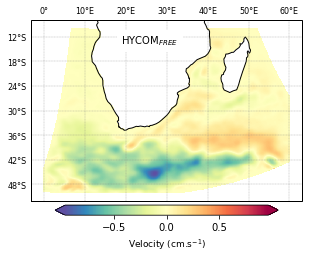

<Figure size 432x288 with 0 Axes>

In [78]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_free['ssh'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, vmin=-1.2, vmax=1.2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Velocity (cm.s$^{-1}$)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/ssh/SSH_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

#### Contourf plot example

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


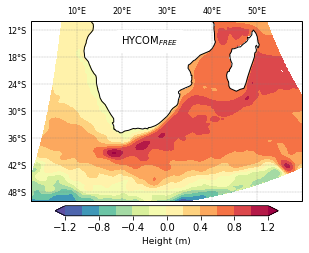

<Figure size 432x288 with 0 Axes>

In [69]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_free['longitude'],ds_free['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

img = ax.contourf(x,y,ds_free['ssh'].mean('time'), cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>FREE</sub> seasonal means

In [18]:
# Group data and mean by season

ds_free_seasonal_mean = ds_free['ssh'].groupby('time.season').mean('time')

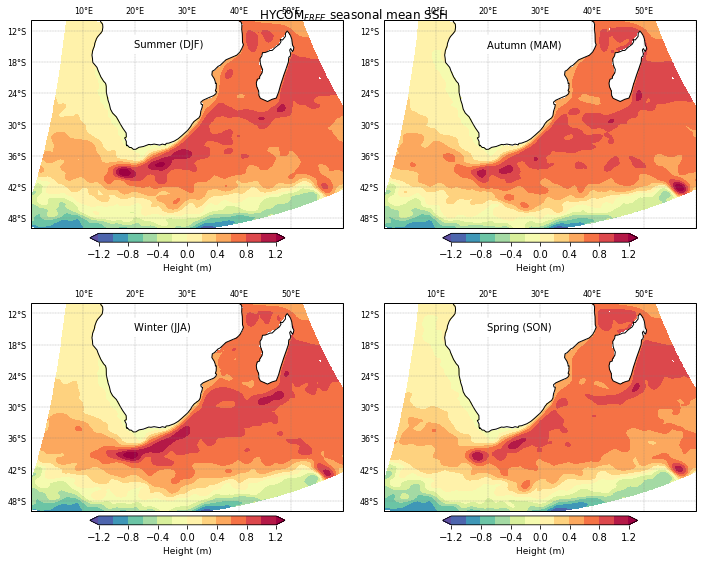

In [76]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ seasonal mean SSH')

x,y = np.meshgrid(ds_free['longitude'],ds_free['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
#     img = ds_free_seasonal_mean[s,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, vmin=-1.2, vmax=1.2)
    img = ax.contourf(x,y,ds_free_seasonal_mean[s,:,:], cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### HYCOM<sub>CCI</sub>

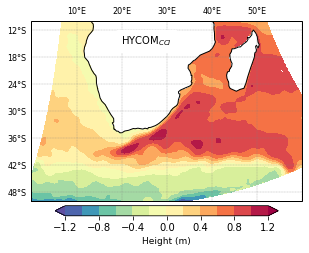

<Figure size 432x288 with 0 Axes>

In [71]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci['longitude'],ds_cci['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

img = ax.contourf(x,y,ds_cci['ssh'].mean('time'), cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_mean_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>CCI</sub> seasonal means

In [57]:
# Group data and mean by season

ds_cci_seasonal_mean = ds_cci['ssh'].groupby('time.season').mean('time')

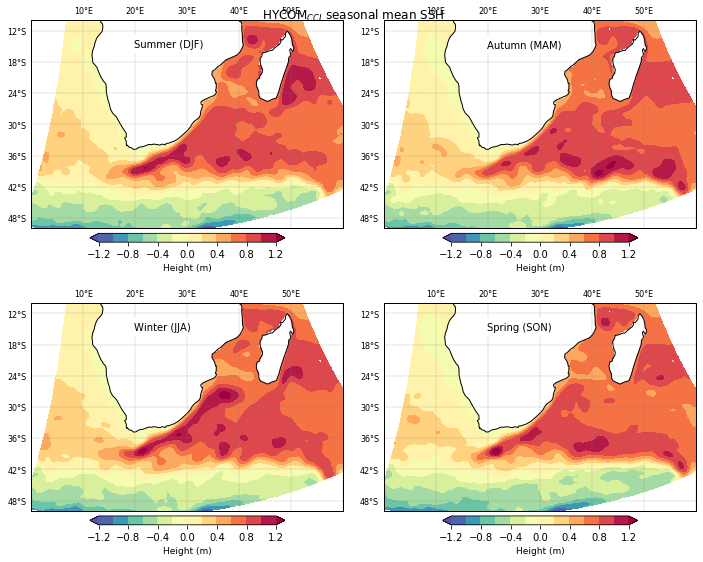

In [75]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ seasonal mean SSH')

x,y = np.meshgrid(ds_cci['longitude'],ds_cci['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ax.contourf(x,y,ds_cci_seasonal_mean[s,:,:], cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmean_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### CMEMS

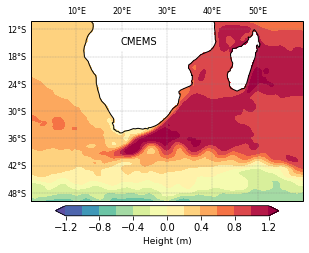

<Figure size 432x288 with 0 Axes>

In [73]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cmems['longitude'],ds_cmems['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

img = ax.contourf(x,y,ds_cmems['adt'].mean('time'), cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'CMEMS', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_mean_CMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### CMEMS seasonal means

In [66]:
# Group data and mean by season

ds_cmems_seasonal_mean = ds_cmems['adt'].groupby('time.season').mean('time')

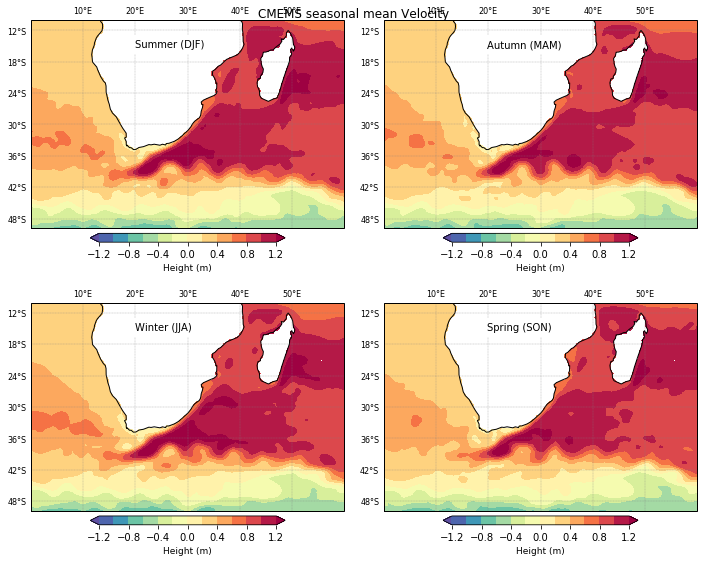

In [74]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('CMEMS seasonal mean ADT')

x,y = np.meshgrid(ds_cmems['longitude'],ds_cmems['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ax.contourf(x,y,ds_cmems_seasonal_mean[s,:,:], cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmean_CMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>) mean SSH

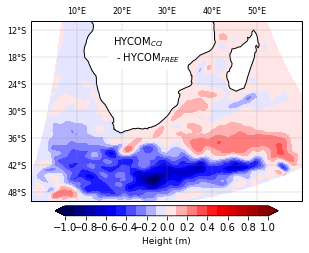

<Figure size 432x288 with 0 Axes>

In [88]:
proj = ccrs.PlateCarree()

diff = ds_cci['ssh'].mean('time') - ds_free['ssh'].mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci['longitude'],ds_cci['latitude'])
cbarticks=np.arange(-1.0,1.1,0.1)

img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_meandiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>) seasonal mean SSH

In [89]:
# Group data and mean by season

ds_free_seasonal_mean = ds_free['ssh'].groupby('time.season').mean('time')
ds_cci_seasonal_mean = ds_cci['ssh'].groupby('time.season').mean('time')

/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


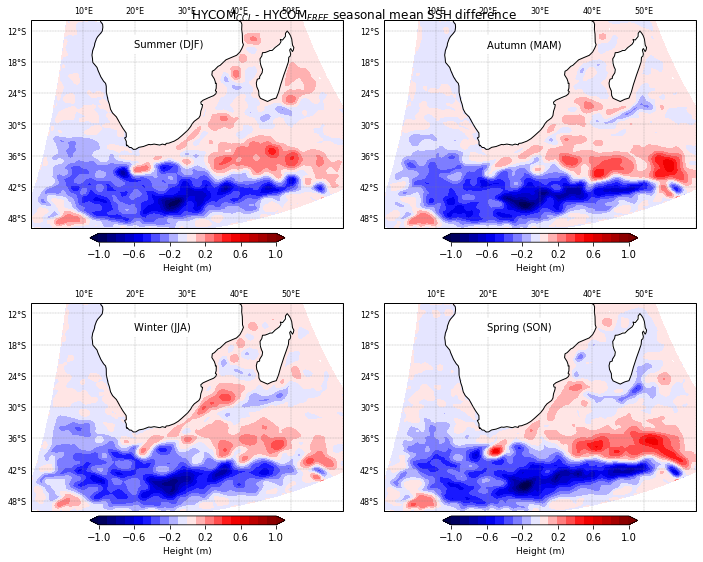

In [94]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ - HYCOM$_{FREE}$ seasonal mean SSH difference')

x,y = np.meshgrid(ds_cci['longitude'],ds_cci['latitude'])
cbarticks=np.arange(-1.0,1.1,0.1)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_seasonal_mean[s,:,:] - ds_free_seasonal_mean[s,:,:]
    
    img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::4], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmeandiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>FREE</sub> - CMEMS ) mean SSH

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


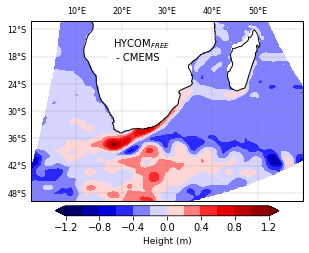

<Figure size 432x288 with 0 Axes>

In [4]:
proj = ccrs.PlateCarree()

diff = ds_free_regrid['ssh'].mean('time') - ds_cmems['adt'].mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_free_regrid['longitude'],ds_free_regrid['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{FREE}$\n - CMEMS', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_meandiff_HYCOMfreeCMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>FREE</sub> - CMEMS) seasonal mean SSH

In [5]:
# Group data and mean by season

ds_free_regrid_seasonal_mean = ds_free_regrid['ssh'].groupby('time.season').mean('time')
ds_cmems_seasonal_mean = ds_cmems['adt'].groupby('time.season').mean('time')

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


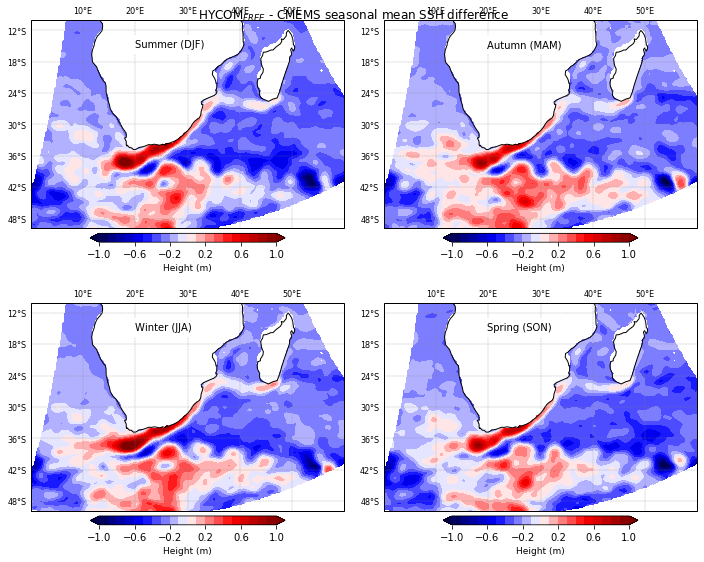

In [6]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ - CMEMS seasonal mean SSH difference')

x,y = np.meshgrid(ds_free_regrid['longitude'],ds_free_regrid['latitude'])
cbarticks=np.arange(-1.0,1.1,0.1)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_free_regrid_seasonal_mean[s,:,:] - ds_cmems_seasonal_mean[s,:,:]
    
    img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::4], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmeandiff_HYCOMfreeCMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - CMEMS ) mean SSH

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


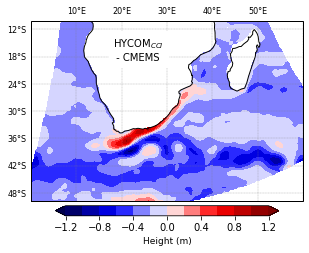

<Figure size 432x288 with 0 Axes>

In [7]:
proj = ccrs.PlateCarree()

diff = ds_cci_regrid['ssh'].mean('time') - ds_cmems['adt'].mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci_regrid['longitude'],ds_cci_regrid['latitude'])
cbarticks=np.arange(-1.2,1.4,0.2)

img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - CMEMS', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/ssh/SSH_meandiff_HYCOMcciCMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - CMEMS) seasonal mean SSH

In [8]:
# Group data and mean by season

ds_cci_regrid_seasonal_mean = ds_cci_regrid['ssh'].groupby('time.season').mean('time')
ds_cmems_seasonal_mean = ds_cmems['adt'].groupby('time.season').mean('time')

/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


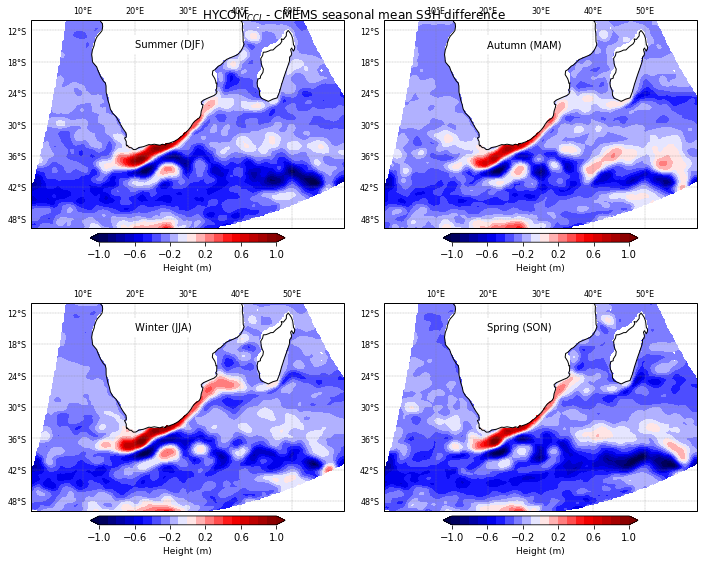

In [9]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ - CMEMS seasonal mean SSH difference')

x,y = np.meshgrid(ds_cci_regrid['longitude'],ds_cci_regrid['latitude'])
cbarticks=np.arange(-1.0,1.1,0.1)

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_regrid_seasonal_mean[s,:,:] - ds_cmems_seasonal_mean[s,:,:]
    
    img = ax.contourf(x,y,diff, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
    cbar = plt.colorbar(img, ticks=cbarticks[::4], shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Height (m)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/ssh/SSH_seasonalmeandiff_HYCOMcciCMEMS.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()